**Importaciones**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

**Carga de datos**

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


**Selección de características y variable objetivo**

In [3]:
# Seleccionar las características y la variable objetivo
X = df[['Total Volume', '4046', '4225', '4770']]  # Características
y = df['AveragePrice']  # Variable objetivo

**Visualización de una muestra**

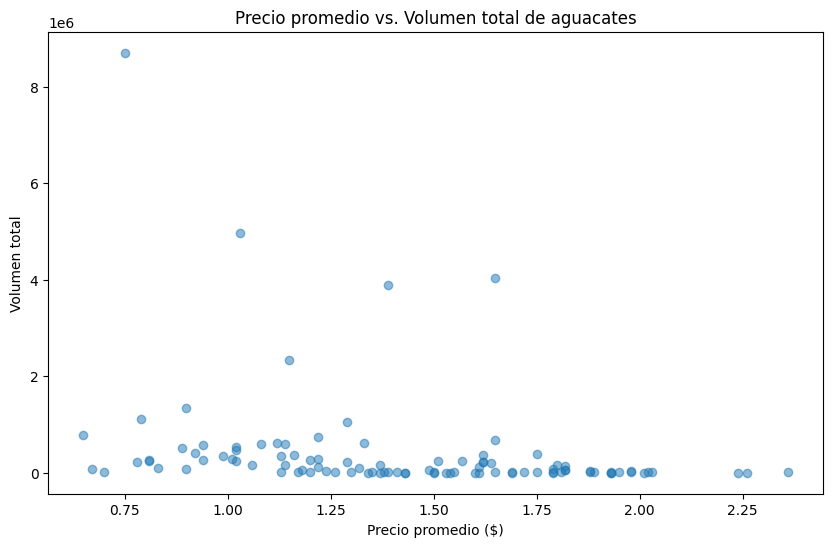

In [4]:
df_sample = df.sample(100)  # Tomar una muestra aleatoria de 100 filas

# Crear una gráfica de dispersión para visualizar la relación entre el precio promedio y el volumen
plt.figure(figsize=(10, 6))
plt.scatter(df_sample['AveragePrice'], df_sample['Total Volume'], alpha=0.5)
plt.title('Precio promedio vs. Volumen total de aguacates')
plt.xlabel('Precio promedio ($)')
plt.ylabel('Volumen total')
plt.show()

**Conjunto de entrenamiento y prueba**

In [5]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Normalización de los datos**

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Construcción del modelo**

In [7]:
# Crear el modelo
model = Sequential()

# Añadir las capas
model.add(Dense(64, input_shape=(4,), activation='relu'))  # Cambia input_dim a input_shape
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Capa de salida para regresión

**Compilación del modelo**

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

**Entrenamiento del modelo**

In [9]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
365/365 [==============================] - 5s 6ms/step - loss: 0.2822 - mean_squared_error: 0.2822 - val_loss: 0.1130 - val_mean_squared_error: 0.1130
Epoch 2/50
365/365 [==============================] - 1s 3ms/step - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.1097 - val_mean_squared_error: 0.1097
Epoch 3/50
365/365 [==============================] - 1s 3ms/step - loss: 0.1082 - mean_squared_error: 0.1082 - val_loss: 0.1047 - val_mean_squared_error: 0.1047
Epoch 4/50
365/365 [==============================] - 2s 4ms/step - loss: 0.1035 - mean_squared_error: 0.1035 - val_loss: 0.1025 - val_mean_squared_error: 0.1025
Epoch 5/50
365/365 [==============================] - 2s 5ms/step - loss: 0.1008 - mean_squared_error: 0.1008 - val_loss: 0.1074 - val_mean_squared_error: 0.1074
Epoch 6/50
365/365 [==============================] - 1s 3ms/step - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 0.1000 - val_mean_squared_error: 0.1000
Epoch 7/50
365/365 [========

**Gráfica del historial de entrenamiento**

<Axes: >

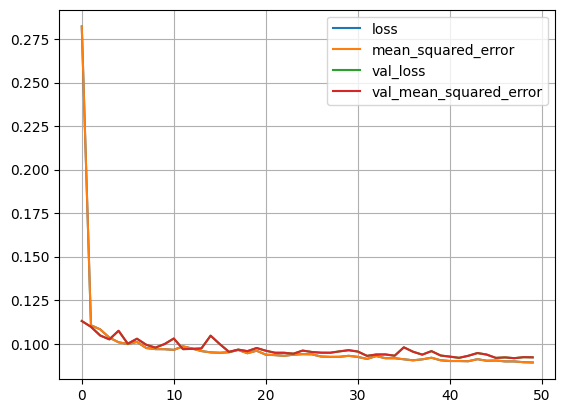

In [10]:
pd.DataFrame(history.history).plot(grid=True)

**Evaluación del modelo**

In [11]:
loss, mse = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {mse}')

115/115 [==============================] - 1s 6ms/step - loss: 0.0922 - mean_squared_error: 0.0922
Pérdida en el conjunto de prueba: 0.09224648773670197
Precisión en el conjunto de prueba: 0.09224648773670197


**Predicción de una muestra**

In [12]:
y_pred = model.predict(X_test)

115/115 [==============================] - 0s 2ms/step


**Métricas**

In [13]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.09224648615343113
Mean Absolute Error (MAE): 0.23026940731740977
R-squared (R2): 0.42586038179461383


**Gráfica de la pérdida de entrenamiento y validación**

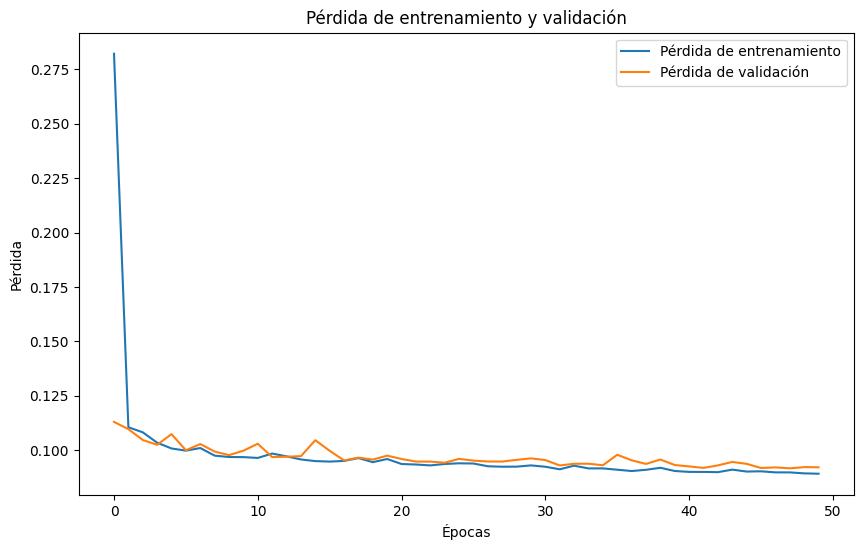

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()